In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [4]:
df = pd.read_csv('../data/bq-results-20210315-170301.csv').T
df = df.rename(columns={0: 'TX', 1: 'FL',2: 'NY', 3: 'CA'}).drop('geo_id', axis=0)
df

,TX,FL,NY,CA
income_less_10000,609111,520876,492408,656515
income_10000_14999,415778,360160,378399,573531
income_15000_19999,431000,389340,325767,499894
income_20000_24999,454863,410675,318683,536077
income_25000_29999,460236,410787,301819,510114
income_30000_34999,456584,402990,300327,513108
income_35000_39999,419784,382842,275108,480115
income_40000_44999,431876,377521,279709,495884
income_45000_49999,372502,331613,243067,439574
income_50000_59999,753148,630925,492299,880868


In [5]:
for col in df.columns:
    df[f'{col}_percentile'] = round(df[f'{col}'].cumsum()*100/df[f'{col}'].sum(), 2)

In [6]:
df['Income rate'] = pd.Series([10000, 14999, 19999, 24999, 29999, 34999, 39999, 44999, 
                                  49999, 59999, 74999, 99999, 124999, 149999, 199999, 250000], index=df.index)

In [8]:
df

,TX,FL,NY,CA,TX_percentile,FL_percentile,NY_percentile,CA_percentile,Income rate
income_less_10000,609111,520876,492408,656515,6.38,6.83,6.73,5.06,10000
income_10000_14999,415778,360160,378399,573531,10.73,11.56,11.90,9.49,14999
income_15000_19999,431000,389340,325767,499894,15.24,16.67,16.35,13.34,19999
income_20000_24999,454863,410675,318683,536077,20.00,22.06,20.71,17.48,24999
income_25000_29999,460236,410787,301819,510114,24.82,27.45,24.84,21.41,29999
income_30000_34999,456584,402990,300327,513108,29.60,32.73,28.94,25.37,34999
income_35000_39999,419784,382842,275108,480115,33.99,37.76,32.70,29.07,39999
income_40000_44999,431876,377521,279709,495884,38.51,42.71,36.52,32.90,44999
income_45000_49999,372502,331613,243067,439574,42.41,47.06,39.85,36.29,49999
income_50000_59999,753148,630925,492299,880868,50.30,55.34,46.57,43.08,59999


ValueError: x must be a label or position

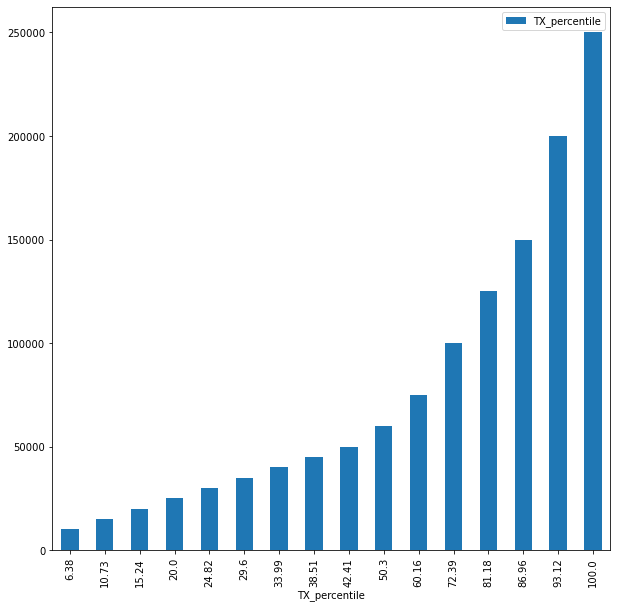

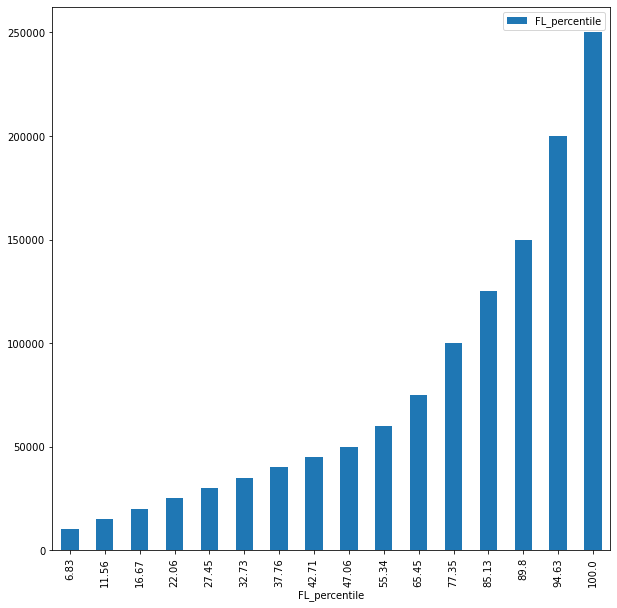

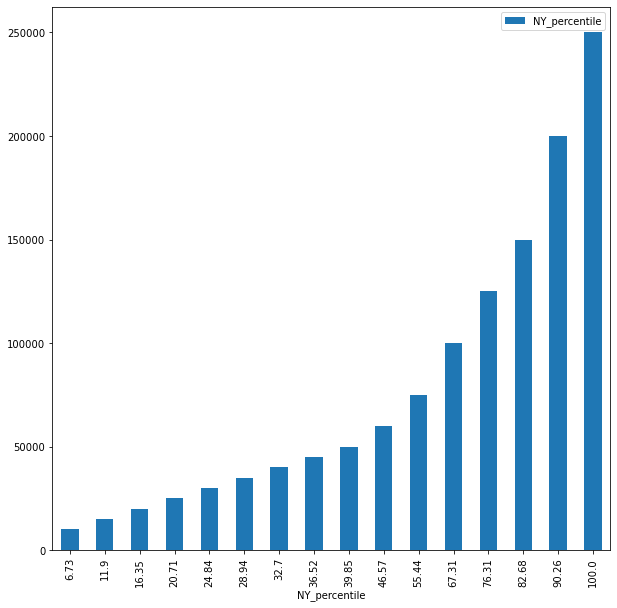

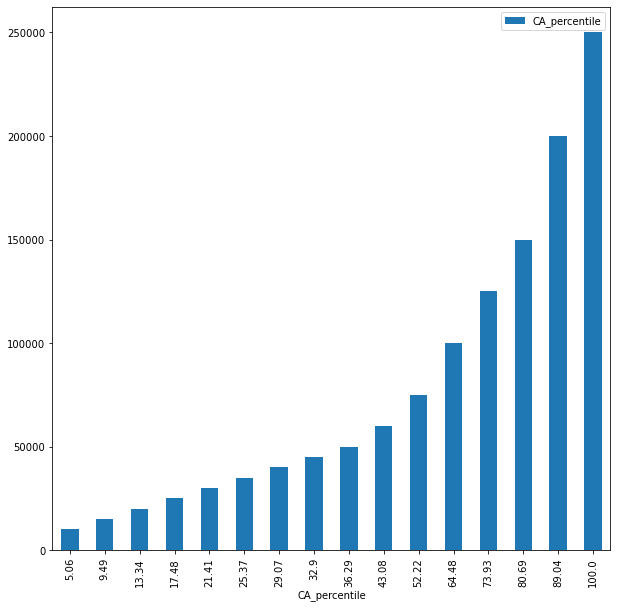

In [9]:
states = ['TX_percentile','FL_percentile','NY_percentile','CA_percentile', 'Income rate']
for x in states: 
    df[[x, 'Income rate']].plot.bar(x = x, y='Income rate', figsize=(10,10), label=x)

In [ ]:
list(map(lambda x: round(x, 2), np.linspace(0.01, 1, 100)))

In [19]:
df = df.reset_index()

In [ ]:
for col in df.columns:
    df[f'{col}_percentile'] = round(df[f'{col}'].cumsum()*100/df[f'{col}'].sum(), 2)

In [30]:
# transitional calculations for mean estimation
df['bin_lower'] = df['index'].apply(lambda x: x.split('_')[1]).str.replace('less', '0').astype(int)
df['bin_upper'] = df['index'].apply(lambda x: x.split('_')[2]).str.replace('or', '1000000').astype(int)
df['bin_mean'] = (df['bin_upper'] + df['bin_lower'])/2
df['bin_width'] = df['bin_upper'] - df['bin_lower']
df['bin_width_norm'] = round(df['bin_width']/min(df['bin_width']))

In [47]:
state_list = ['TX', 'CA', 'NY', 'FL']
for state in state_list:
    df[f'{state}_hist'] = round(df[f'{state}']/df['bin_width_norm'], 2)
df

,index,TX,FL,NY,CA,TX_percentile,FL_percentile,NY_percentile,CA_percentile,Income rate,bin_lower,bin_upper,bin_mean,bin_width,bin_width_norm,TX_hist,CA_hist,NY_hist,FL_hist
0,income_less_10000,609111,520876,492408,656515,6.38,6.83,6.73,5.06,10000,0,10000,5000.0,10000,2.0,304555.50,328257.50,246204.0,260438.00
1,income_10000_14999,415778,360160,378399,573531,10.73,11.56,11.90,9.49,14999,10000,14999,12499.5,4999,1.0,415778.00,573531.00,378399.0,360160.00
2,income_15000_19999,431000,389340,325767,499894,15.24,16.67,16.35,13.34,19999,15000,19999,17499.5,4999,1.0,431000.00,499894.00,325767.0,389340.00
3,income_20000_24999,454863,410675,318683,536077,20.00,22.06,20.71,17.48,24999,20000,24999,22499.5,4999,1.0,454863.00,536077.00,318683.0,410675.00
4,income_25000_29999,460236,410787,301819,510114,24.82,27.45,24.84,21.41,29999,25000,29999,27499.5,4999,1.0,460236.00,510114.00,301819.0,410787.00
5,income_30000_34999,456584,402990,300327,513108,29.60,32.73,28.94,25.37,34999,30000,34999,32499.5,4999,1.0,456584.00,513108.00,300327.0,402990.00
6,income_35000_39999,419784,382842,275108,480115,33.99,37.76,32.70,29.07,39999,35000,39999,37499.5,4999,1.0,419784.00,480115.00,275108.0,382842.00
7,income_40000_44999,431876,377521,279709,495884,38.51,42.71,36.52,32.90,44999,40000,44999,42499.5,4999,1.0,431876.00,495884.00,279709.0,377521.00
8,income_45000_49999,372502,331613,243067,439574,42.41,47.06,39.85,36.29,49999,45000,49999,47499.5,4999,1.0,372502.00,439574.00,243067.0,331613.00
9,income_50000_59999,753148,630925,492299,880868,50.30,55.34,46.57,43.08,59999,50000,59999,54999.5,9999,2.0,376574.00,440434.00,246149.5,315462.50


In [58]:
state_means = {}

for state in state_list:
    state_means[f'{state}'] = round((df['bin_mean']*df[f'{state}_hist']).sum()/df[f'{state}'].sum(), 2)
    
state_means

{'TX': 22294.07, 'CA': 21204.87, 'NY': 21045.79, 'FL': 22839.67}